# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

import pylab as pl
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Price'>

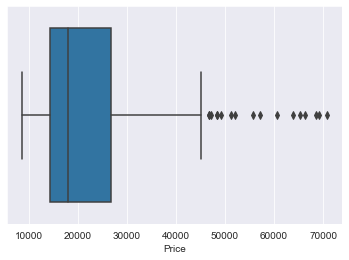

In [8]:
sns.boxplot(x=df["Price"])

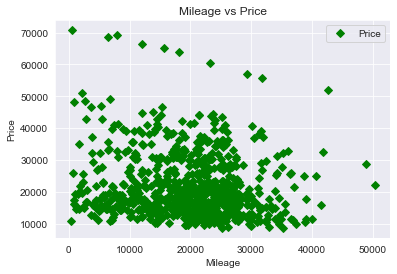

In [9]:
df.plot(x='Mileage',y='Price',style='D',color='g')
plt.title('Mileage vs Price')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [10]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [11]:
X=df[["Mileage"]]
y=df[["Price"]]

In [12]:
display(X)

,Mileage
0,8221
1,9135
2,13196
3,16342
4,19832
...,...
799,16229
800,19095
801,20484
802,25979


In [14]:
display(y)

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [15]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [16]:
X_train

,Mileage
309,32844
433,14754
613,18206
108,25339
801,20484
...,...
715,18187
767,12412
72,12052
235,22571


In [17]:
X_test

,Mileage
8,24021
791,32619
571,2189
224,22405
498,27574
...,...
494,20510
364,19874
676,24031
41,10036


In [18]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) 

LinearRegression()

In [19]:
print(regressor.intercept_)

[24747.25495215]


In [20]:
print(regressor.coef_)

[[-0.17078142]]


In [21]:
y_pred = regressor.predict(X_test) 
"Syntax : varName.predict(test_features)"
y_pred

array([[20644.91453158],
       [19176.53590721],
       [24373.41443008],
       [20920.89730165],
       [20038.12815657],
       [21851.14368068],
       [22518.55745877],
       [23422.84506241],
       [22682.5076192 ],
       [21593.9468665 ],
       [21297.47032639],
       [20264.24275283],
       [20469.52201621],
       [21067.76932037],
       [21601.63203027],
       [20260.48556165],
       [22031.31807574],
       [21851.48524351],
       [21488.57473214],
       [22785.31803231],
       [20345.02236313],
       [22530.51215797],
       [21376.02977826],
       [23605.58117872],
       [24442.06855976],
       [20070.57662582],
       [19863.24798544],
       [20342.11907904],
       [22822.03603699],
       [19401.28425214],
       [24338.7458024 ],
       [20468.83889054],
       [21158.62503427],
       [18827.11712779],
       [21625.8829915 ],
       [20755.92245271],
       [22829.55041934],
       [21076.82073547],
       [20961.20171608],
       [18663.33774878],


In [22]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.02460778370101413


We can conclude that it is a very poor R2-Value

### Part 1

#### 1.  Find the linear regression equation for mileage vs price.

y= 24747.25495215*c + (-0.17078142)

#### 2. Chart the original data and the equation on the chart.

InvalidIndexError: (slice(None, None, None), None)

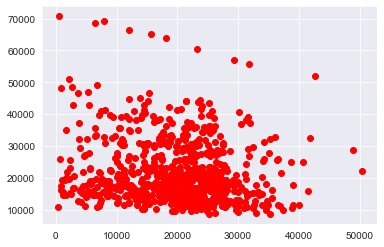

In [32]:
plt.scatter(X, y, color='r')
plt.plot(X, regressor.predict(X))
plt.xlabel('Mileage')
plt.ylabel('Price')


#### 3. Find the equation's     score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [33]:
print('intercept:', regressor.intercept_)
print('coefficients:',regressor.coef_)
print('r-squared:', regressor.score(X, y))

intercept: [24747.25495215]
coefficients: [[-0.17078142]]
r-squared: 0.020458341573318273


Since this is below 0.8, this is not a good fit for this data.

### Part 2

#### 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
    


In [35]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[feature]
Y = df[['Price']]

In [36]:
x

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [37]:
Y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [38]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [39]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state = 1)

In [40]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) 

LinearRegression()

In [41]:
print(regressor.intercept_)
print(regressor.coef_)

[5095.48361195]
[[-1.61381009e-01  4.16991474e+03 -1.05536033e+03 -1.43669150e+03
   6.15697776e+03 -1.70468632e+03  3.34683265e+03]]


In [42]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([[26723.86626887],
       [17946.3071575 ],
       [27803.69791033],
       [14606.3716982 ],
       [22064.8946619 ],
       [12612.03105733],
       [22704.10611663],
       [27749.73947399],
       [22639.06663438],
       [20125.11930876],
       [19056.69489081],
       [31416.25067806],
       [17463.43645596],
       [19627.90441973],
       [25184.48413264],
       [23917.15906819],
       [19750.14908691],
       [20368.48187048],
       [21299.77993469],
       [19651.76293935],
       [22354.89633525],
       [13254.00471153],
       [25287.90791724],
       [35117.4600846 ],
       [26226.42674355],
       [23737.70338607],
       [16784.99784112],
       [33194.52673964],
       [16550.69926751],
       [30600.79243908],
       [17772.85194425],
       [20767.21124542],
       [18747.82502291],
       [22773.76032389],
       [25524.00833355],
       [32424.65656676],
       [22997.9809342 ],
       [18037.30732432],
       [14108.97713557],
       [19377.69931484],


#### 3. Find the equation's score.

In [43]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.37900794053708486


In [44]:
print('intercept:', regressor.intercept_)
print('coefficients:',regressor.coef_)
print('r-squared:', regressor.score(x, Y))

intercept: [5095.48361195]
coefficients: [[-1.61381009e-01  4.16991474e+03 -1.05536033e+03 -1.43669150e+03
   6.15697776e+03 -1.70468632e+03  3.34683265e+03]]
r-squared: 0.44516644553610085


R-squared score based on Mileage, cylinder, liter,  doors, cruise, sound, and leather : 0.446264353673.


This also not a strong correlation.

### Part 3

#### 1. 

In [45]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [46]:
df_with_dummies.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [47]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X1 = df_with_dummies[columns]
y1 = df_with_dummies['Price']

regr= LinearRegression()
regr.fit(X1, y1)

LinearRegression()

In [48]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X1, y1))

Intercept: 23983.771909616702
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
Score: 0.9363889951039477


In [49]:
features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]

In [50]:
# find the best combination?
combos = []
   
for i in range(1, 11):
    combos.append(itertools.combinations(features, i))   

In [51]:
check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        xam = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])

In [52]:
xam

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0
800,19095,6,3.0,4,1,1,0
801,20484,6,3.0,4,1,1,0
802,25979,6,3.0,4,1,1,0


In [53]:
Y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [54]:
X = df[['Cylinder', 'Liter', 'Cruise', 'Doors','Sound', 'Mileage']].values #array of features
y = df['Price'].values #array of targets

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [58]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
coeff_df = pd.DataFrame(regressor.coef_,['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Cylinder,3336.332691
Liter,848.919079
Cruise,2550.519418
Doors,-1047.036082
Sound,-666.164187
Mileage,-1500.478247


In [61]:
regressor.intercept_

21034.11410660531

In [62]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,33220.028446,31228.073008
1,34355.003728,20595.414623
2,34739.214960,33465.389383
3,11080.516378,8899.542963
4,16341.804099,16927.520032
...,...,...
237,14702.798320,20759.963467
238,23329.208256,18576.540705
239,14997.884336,14059.337514
240,39092.189918,34794.391063


In [63]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4214824657835169


According to the coefficients of the features Cylinder, Cruise and Mileage are the best features to predict the price of car.

In [64]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['Cylinder', 'Liter', 'Cruise','Doors','Sound','Mileage'],selector.support_))

[('Cylinder', True),
 ('Liter', False),
 ('Cruise', True),
 ('Doors', False),
 ('Sound', True),
 ('Mileage', False)]

Using This we conclude that, Cylinder, Cruise and Mileage are the best features.append